In [ ]:
import os
from PIL import Image
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
from PIL import Image, ImageDraw
import numpy as np

img_folder = "/home/eric/data/military_data/tanks_20/image_splits"
ann_path = "/home/eric/data/military_data/tanks_20/roboflow/label/_annotations.coco.json"

In [86]:
img_list = sorted(glob(os.path.join(img_folder,"*.png")))

In [98]:
with open(ann_path, "r") as f:
    ann_data = json.load(f)

In [100]:
ann_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [101]:
img = Image.open('/home/eric/data/military_data/tanks_20/image_splits/001_bottom_right.png')

filename /home/eric/data/military_data/tanks_20/image_splits/001_bottom_right.png


filename /home/eric/data/military_data/tanks_20/image_splits/001_bottom_right.png


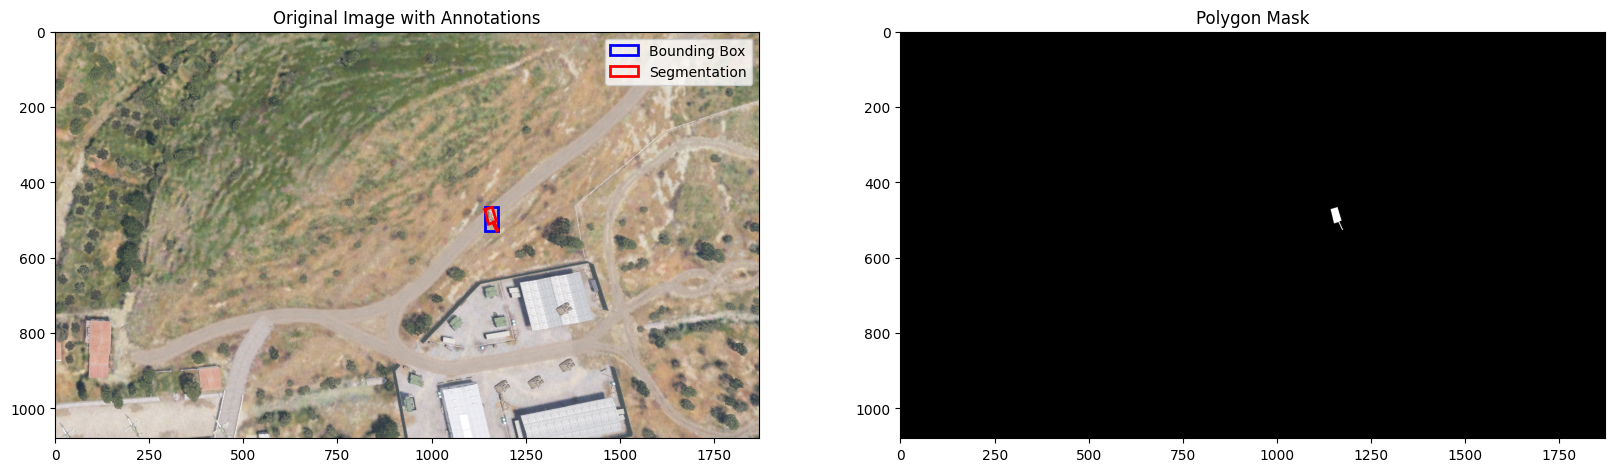

In [120]:
img = Image.open('/home/eric/data/military_data/tanks_20/image_splits/001_bottom_right.png')
img_width, img_height = img.size

data = ann_data["annotations"][0]

# Extract segmentation
segmentation = data['segmentation'][0]

# Create a blank mask with the same size as the image
mask = Image.new('L', (img_width, img_height), 0)  # Black mask

# Convert segmentation points to integers and draw the polygon
polygon_points = [(int(segmentation[i]), int(segmentation[i + 1])) for i in range(0, len(segmentation), 2)]
ImageDraw.Draw(mask).polygon(polygon_points, outline=0, fill=255)  # Draw white polygon (value 1)

# Convert the mask to a numpy array for visualization
mask_array = np.array(mask)

# Visualize the original image and the mask
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Original image with bounding box and segmentation
ax[0].imshow(img)
rect = Rectangle((data['bbox'][0], data['bbox'][1]), data['bbox'][2], data['bbox'][3],
                 linewidth=2, edgecolor='blue', facecolor='none', label='Bounding Box')
ax[0].add_patch(rect)
polygon = Polygon(polygon_points, closed=True, edgecolor='red', fill=False, linewidth=2, label='Segmentation')
ax[0].add_patch(polygon)
#ax[0].invert_yaxis()  # Invert y-axis
ax[0].set_title('Original Image with Annotations')
ax[0].legend()

# Mask
ax[1].imshow(mask_array, cmap='gray')
ax[1].set_title('Polygon Mask')

plt.show()

# Save the mask if needed
mask.save('/home/eric/data/military_data/tanks_20/mask/001_bottom_right.png')

In [117]:
np.unique(mask_array)

array([  0, 255], dtype=uint8)

In [118]:
mask_s = Image.open("/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/severstal_steel/support/mask/56de9f0d1_mask.png")

filename /home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/SmallObjectFSS/SOFS/Open_Domain_Data/severstal_steel/support/mask/56de9f0d1_mask.png


In [119]:
np.unique( np.asarray(mask_s) )

array([  0, 255], dtype=uint8)